**Benedictus Bayu Pramudhito**

In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive')))

Getting started.pdf
Tugas Akhir
Banyuwangi-Bali 
ionosphere_data_kaggle.csv
CV Benedictus Bayu_(4) (1).pdf
CV Benedictus Bayu_(4).pdf
PT Transavia - Application Form (English) 2019.docx
PT Transavia - Application Form (English) 2019.gdoc
Video Telkom Marsya
Video Telkom Bene
Form Kandidat INDOCYBER (32).docx
Form Kandidat INDOCYBER (32).gdoc
Certificates
Colab Test (Bootcamp ML 2020)
Colab Notebooks
cats-dogs.zip
santa-dataset.zip
Cermati
titanic_train.csv
titanic_eval.csv
winequality-white.csv


In [41]:
df = pd.read_csv(r'./drive/My Drive/winequality-white.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [42]:
df.shape

(4898, 12)

In [43]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [44]:
#Cek missing values
print(df.isnull().sum())
print('\nTerdapat {} Missing Values pada Dataset'.format(df.isnull().sum().sum()))

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Terdapat 0 Missing Values pada Dataset


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [46]:
#Cek korelasi
df.corr()['quality'][:-1]

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

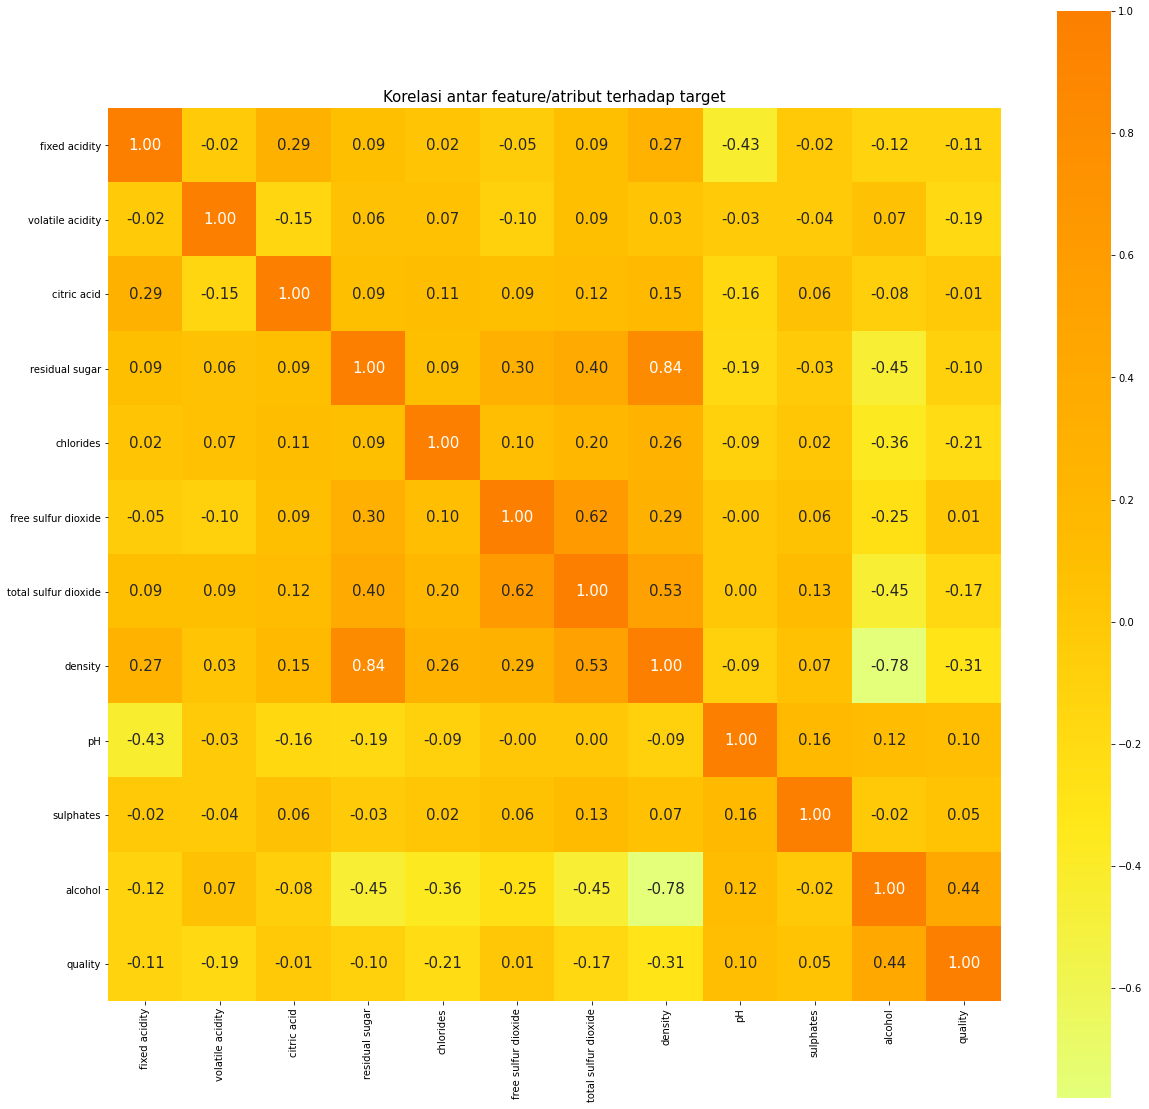

In [47]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Wistia')
plt.title('Korelasi antar feature/atribut terhadap target', fontsize=15)
plt.show()

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


**Binning**

In [49]:
print(min(df['quality']), max(df['quality']))

3 9


In [50]:
bins = np.linspace(min(df['quality']), max(df['quality']), 3)
bins

array([3., 6., 9.])

In [51]:
qual_names = ['bad', 'good']
df['quality_categories'] = pd.cut(df['quality'], bins, labels=qual_names, include_lowest=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_categories
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,bad
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,bad
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,bad
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,bad
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,bad


**Label Encoding**

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
label_encode = LabelEncoder()
df['quality_categories'] = label_encode.fit_transform(df['quality_categories'])

0    3838
1    1060
Name: quality_categories, dtype: int64 



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


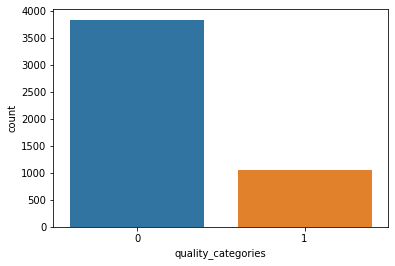

In [54]:
print(df['quality_categories'].value_counts(), '\n')
sns.countplot(df['quality_categories'])

In [55]:
df.shape

(4898, 13)

In [56]:
df.drop(['quality'], axis=1, inplace=True)

**Dataset Splitting**

In [57]:
X = df.drop(['quality_categories'], axis=1)
y = df['quality_categories']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3918, 11), (980, 11), (3918,), (980,))

## **Deep learning Model**

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
def plot_loss_new(history):
  history_df = pd.DataFrame(history.history)

  min_loss_index = history_df[history_df['loss']==min(history_df['loss'])].index.values
  min_loss = history_df.loc[min_loss_index]['loss']
  min_val_loss_index = history_df[history_df['val_loss']==min(history_df['val_loss'])].index.values
  min_val_loss = history_df.loc[min_val_loss_index]['val_loss']

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(min_loss_index, min_loss, 'o', c='k', ms=4, label='min loss')
  plt.plot(min_val_loss_index, min_val_loss, 'o', c='k', ms=4, label='min val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  print('Minimum Loss             :', min_loss)
  print()
  print('Minimum Validation Loss  :', min_val_loss)

**Baseline Model**

In [61]:
model = Sequential()
model.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu')) #memakai 11 neuron
model.add(Dense(1, kernel_initializer='normal')) #1 neuron karena hanya ada 2 kelas

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 12        
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [63]:
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
123/123 [==============================] - 0s 3ms/step - loss: 0.5613 - accuracy: 0.7769 - val_loss: 0.5293 - val_accuracy: 0.7765
Epoch 2/100
123/123 [==============================] - 0s 1ms/step - loss: 0.5072 - accuracy: 0.7848 - val_loss: 0.4970 - val_accuracy: 0.7765
Epoch 3/100
123/123 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.7859 - val_loss: 0.4865 - val_accuracy: 0.7765
Epoch 4/100
123/123 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.7853 - val_loss: 0.4932 - val_accuracy: 0.7776
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.7787 - val_loss: 0.4989 - val_accuracy: 0.7765
Epoch 6/100
123/123 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7851 - val_loss: 0.4882 - val_accuracy: 0.7765
Epoch 7/100
123/123 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.7848 - val_loss: 0.4742 - val_accuracy: 0.7776

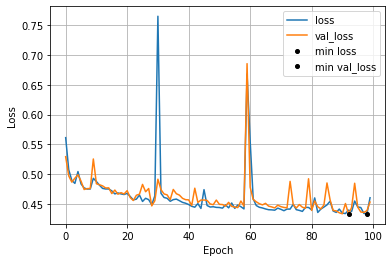

Minimum Loss             : 98    0.433329
Name: loss, dtype: float64

Minimum Validation Loss  : 92    0.43312
Name: val_loss, dtype: float64


In [64]:
plot_loss_new(history)

Model tidak overfit, walaupun masih terjadi peningkatan dan penurunan nilai loss dan val_loss. Val_loss minimum ada di epoch 92 dengan nilai 0.433132 dengan val_accuracy 0.7837

**Deeper Model**

In [65]:
deep = Sequential()
deep.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
deep.add(Dense(6, kernel_initializer='normal', activation='relu'))
deep.add(Dense(1, kernel_initializer='normal'))

deep.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
deep.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [67]:
history_deep = deep.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
123/123 [==============================] - 0s 3ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 2/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 3/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 4/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 6/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 7/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765

In [68]:
predict_deep = deep.predict(X_test)

predict_deep = predict_deep.flatten()

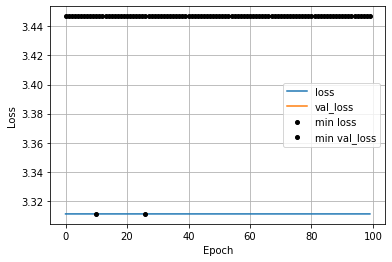

Minimum Loss             : 10    3.310969
26    3.310969
Name: loss, dtype: float64

Minimum Validation Loss  : 0     3.447004
1     3.447004
2     3.447004
3     3.447004
4     3.447004
        ...   
95    3.447004
96    3.447004
97    3.447004
98    3.447004
99    3.447004
Name: val_loss, Length: 100, dtype: float64


In [69]:
plot_loss_new(history_deep)

Model overfit, nilai val_loss 3.447004 dengan val_accuracy 0.7765

**Wider Model**

In [70]:
wider = Sequential()
wider.add(Dense(20, input_dim=11, kernel_initializer='normal', activation='relu'))
wider.add(Dense(1, kernel_initializer='normal'))

wider.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
wider.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                240       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [72]:
history_wide = wider.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
123/123 [==============================] - 0s 4ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 2/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 3/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 4/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 5/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 6/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 7/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765

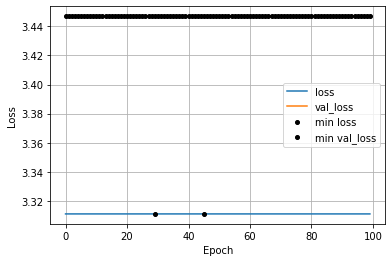

Minimum Loss             : 29    3.310969
45    3.310969
Name: loss, dtype: float64

Minimum Validation Loss  : 0     3.447004
1     3.447004
2     3.447004
3     3.447004
4     3.447004
        ...   
95    3.447004
96    3.447004
97    3.447004
98    3.447004
99    3.447004
Name: val_loss, Length: 100, dtype: float64


In [74]:
plot_loss_new(history_wide)

Model overfit, nilai val_loss 3.447004 dengan val_accuracy 0.7765

**Base layer dengan SGD**

In [76]:
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

opt = SGD(learning_rate=0.001, momentum=0.9)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 12        
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [78]:
history_sgd = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
123/123 [==============================] - 0s 2ms/step - loss: 3.3521 - accuracy: 0.7802 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 2/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 3/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 4/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 5/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 6/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 7/100
123/123 [==============================] - 0s 1ms/step - loss: 3.3110 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765

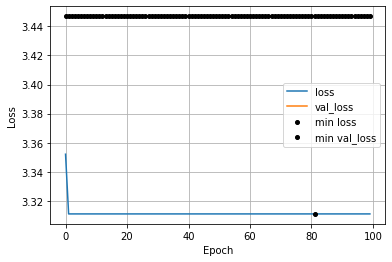

Minimum Loss             : 81    3.310968
Name: loss, dtype: float64

Minimum Validation Loss  : 0     3.447004
1     3.447004
2     3.447004
3     3.447004
4     3.447004
        ...   
95    3.447004
96    3.447004
97    3.447004
98    3.447004
99    3.447004
Name: val_loss, Length: 100, dtype: float64


In [79]:
plot_loss_new(history_sgd)

Model overfit, nilai val_loss 3.447004 dengan val_accuracy 0.7765

**Base layer dengan Dropout dan SGD**

In [80]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal'))

opt = SGD(learning_rate=0.001, momentum=0.9)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 11)                132       
_________________________________________________________________
dropout (Dropout)            (None, 11)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 12        
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [82]:
history_dropout = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
123/123 [==============================] - 0s 3ms/step - loss: 3.6977 - accuracy: 0.7351 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 2/100
123/123 [==============================] - 0s 1ms/step - loss: 2.9936 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 3/100
123/123 [==============================] - 0s 1ms/step - loss: 2.9666 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 4/100
123/123 [==============================] - 0s 1ms/step - loss: 2.9291 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 5/100
123/123 [==============================] - 0s 1ms/step - loss: 2.9808 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 6/100
123/123 [==============================] - 0s 1ms/step - loss: 2.9581 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765
Epoch 7/100
123/123 [==============================] - 0s 1ms/step - loss: 2.9496 - accuracy: 0.7853 - val_loss: 3.4470 - val_accuracy: 0.7765

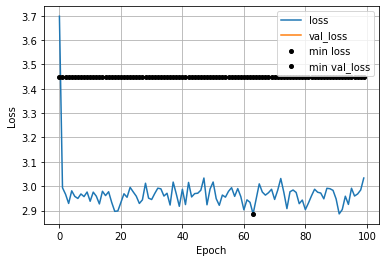

Minimum Loss             : 63    2.88607
Name: loss, dtype: float64

Minimum Validation Loss  : 0     3.447004
1     3.447004
2     3.447004
3     3.447004
4     3.447004
        ...   
95    3.447004
96    3.447004
97    3.447004
98    3.447004
99    3.447004
Name: val_loss, Length: 100, dtype: float64


In [83]:
plot_loss_new(history_dropout)

Model overfit, nilai val_loss 3.447004 dengan val_accuracy 0.7765

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

**Deep layer dengan dropout**

In [87]:
deep1 = Sequential()
deep1.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
deep1.add(Dropout(0.25))
deep1.add(Dense(6, kernel_initializer='normal', activation='relu'))
deep1.add(Dropout(0.25))
deep1.add(Dense(1, kernel_initializer='normal'))

deep1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
deep1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 11)                132       
_________________________________________________________________
dropout_1 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 6)                 72        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 7         
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [90]:
history_dropout_deep = deep1.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
123/123 [==============================] - 0s 3ms/step - loss: 0.6163 - accuracy: 0.7825 - val_loss: 0.5621 - val_accuracy: 0.7765
Epoch 2/100
123/123 [==============================] - 0s 1ms/step - loss: 0.5598 - accuracy: 0.7836 - val_loss: 0.5513 - val_accuracy: 0.7765
Epoch 3/100
123/123 [==============================] - 0s 1ms/step - loss: 0.5424 - accuracy: 0.7846 - val_loss: 0.5437 - val_accuracy: 0.7765
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.7846 - val_loss: 0.5159 - val_accuracy: 0.7765
Epoch 5/100
123/123 [==============================] - 0s 1ms/step - loss: 0.5171 - accuracy: 0.7848 - val_loss: 0.4996 - val_accuracy: 0.7765
Epoch 6/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.7848 - val_loss: 0.4893 - val_accuracy: 0.7765
Epoch 7/100
123/123 [==============================] - 0s 1ms/step - loss: 0.4963 - accuracy: 0.7853 - val_loss: 0.4845 - val_accuracy: 0.7765

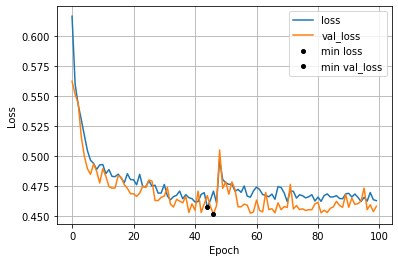

Minimum Loss             : 44    0.45708
Name: loss, dtype: float64

Minimum Validation Loss  : 46    0.451538
Name: val_loss, dtype: float64


In [91]:
plot_loss_new(history_dropout_deep)

Model tidak overfit, val_loss minimum ada di epoch 46 dengan nilai 0.451538 dengan val_accuracy 0.788

Model terbaik diperoleh dengan Model Deeper dengan Dropout dan optimizer Adam dengan val_loss 0.451538 dan val_accuracy 0.788